# <center>Time Series</center>

> Numpy's datetime64

In [9]:
import numpy as np
#encodes date as 64 bit int
date = np.array('2024-07-04', dtype = np.datetime64)

In [10]:
#Quick vectorized operation
date + np.arange(12)

array(['2024-07-04', '2024-07-05', '2024-07-06', '2024-07-07',
       '2024-07-08', '2024-07-09', '2024-07-10', '2024-07-11',
       '2024-07-12', '2024-07-13', '2024-07-14', '2024-07-15'],
      dtype='datetime64[D]')

>Pandas' DatetimeIndex:

In [11]:
import pandas as pd 

In [12]:
index = pd.DatetimeIndex(['2020-07-04', '2020-08-04','2021-07-04', '2021-08-04'])

In [13]:
data = pd.Series([0, 1, 2, 3], index = index)

In [14]:
data['2021']

2021-07-04    2
2021-08-04    3
dtype: int64

> Time Series' Data Structure

In [15]:
#DatetimeIndex
from datetime import datetime
dates = pd.to_datetime([datetime(2021, 7, 3), '4th of July, 2021', '2021-Jul-6', '07-07-2021', '20210708'])
dates

DatetimeIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
               '2021-07-08'],
              dtype='datetime64[ns]', freq=None)

In [16]:
#PeriodIndex
dates.to_period('D')

PeriodIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
             '2021-07-08'],
            dtype='period[D]')

In [17]:
#TimedeltaIndex -> duration
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [18]:
from analysis_tools.display import Display
Display.display(
    ("8 period Range", pd.date_range('2015-07-03', periods=8)),
    #  FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
    ("8 period Range in Hours ", pd.date_range('2015-07-03', periods=8, freq ='h')),
    ("6 period Duration Range in Hours ", pd.timedelta_range(0, periods=6, freq='2h30min')),
    ("8 period 'PeriodIndex' in Months ", pd.period_range('2015-07', periods=8, freq='M'))
    )

### <center> SECTION 2 </center>
### <center> Resampling, Shifting, and Windowing </center>

In [19]:
from pandas_datareader import data

In [20]:
'''
pandas_datareader Deprecation: As of recent updates, 
Yahoo Finance is no longer natively supported in pandas_datareader due to API changes. 
sp500 = data.DataReader('^GSPC', start='2018', end='2022', data_source='yahoo') #won't work
'''

"\npandas_datareader Deprecation: As of recent updates, \nYahoo Finance is no longer natively supported in pandas_datareader due to API changes. \nsp500 = data.DataReader('^GSPC', start='2018', end='2022', data_source='yahoo') #won't work\n"

In [21]:
# pip install yfinance

import yfinance as yf

# Fetch S&P 500 data using yfinance
sp500 = yf.download('^GSPC', start='2018-01-01', end='2022-12-31')

# Display the first few rows of the data
print(sp500.head())

[*********************100%***********************]  1 of 1 completed


Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2018-01-02  2695.810059  2695.889893  2682.360107  2683.729980  3397430000
2018-01-03  2713.060059  2714.370117  2697.770020  2697.850098  3544030000
2018-01-04  2723.989990  2729.290039  2719.070068  2719.310059  3697340000
2018-01-05  2743.149902  2743.449951  2727.919922  2731.330078  3239280000
2018-01-08  2747.709961  2748.510010  2737.600098  2742.669922  3246160000


In [22]:
sp500['Close']

Ticker,^GSPC
Date,
2018-01-02,2695.810059
2018-01-03,2713.060059
2018-01-04,2723.989990
2018-01-05,2743.149902
2018-01-08,2747.709961
...,...
2022-12-23,3844.820068
2022-12-27,3829.250000
2022-12-28,3783.219971


In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

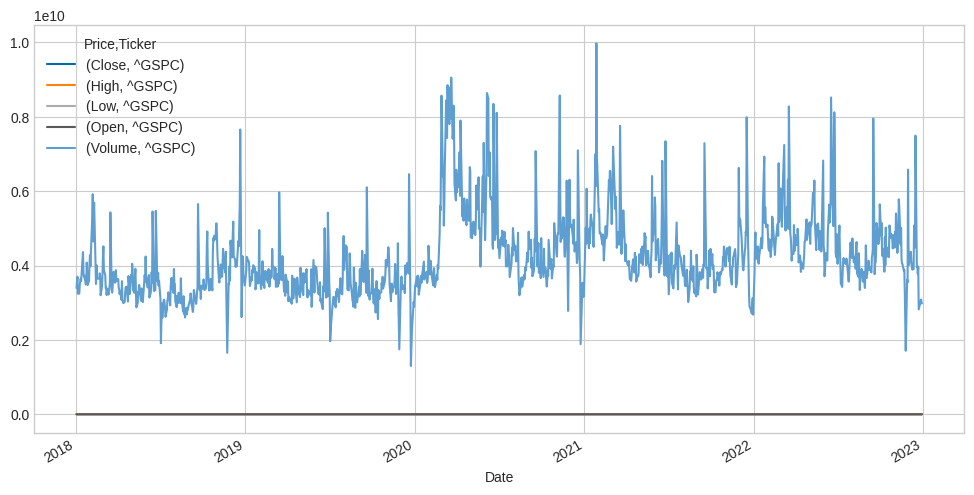

In [28]:
# plt.style.available #... to see available styles
plt.style.use('seaborn-v0_8-whitegrid')
sp500.plot(figsize=(12, 6));

#####  Resampling and Converting Frequencies
> using the `resample` data aggregation method, or the much simpler `asfreq` data selection.

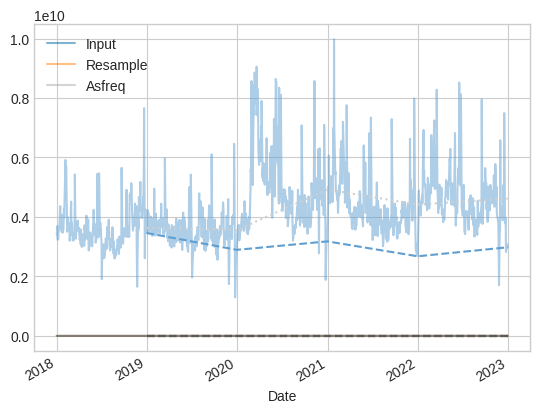

In [32]:
# Assuming sp500 is a pandas Series or DataFrame with a datetime index
fig, ax = plt.subplots()  # Create a single matplotlib Axes object

# /tmp/ipykernel_6937/1138896904.py:8: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
#   sp500.resample('BA').mean().plot(ax=ax, style=':')

# Plot the original data
sp500.plot(ax=ax, alpha=0.5, style='-')

# Plot the resampled (yearly average) data
sp500.resample('BYE').mean().plot(ax=ax, style=':')

# Plot the data as it appears with the annual frequency
sp500.asfreq('BYE').plot(ax=ax, style='--')

# Add a legend to the plot
ax.legend(['Input', 'Resample', 'Asfreq'], loc='upper left')
